# Splines Cúbicos
Irving Gomez Mendez

April 01, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.interpolate as interpolate
from scipy.stats import t

In [2]:
def m(x):
    return(3*x - 3*x**2 + x**3 - 0.1*x**4)

In [3]:
alpha = 0.05
nn = 30
xx = np.linspace(0,3,nn)
np.random.seed(111)
epsilon = np.random.normal(0, 0.15, nn)
yy = np.array([m(x) for x in xx])+epsilon
x_vect = np.linspace(0,3,100)
y_vect = np.array([m(x) for x in x_vect])

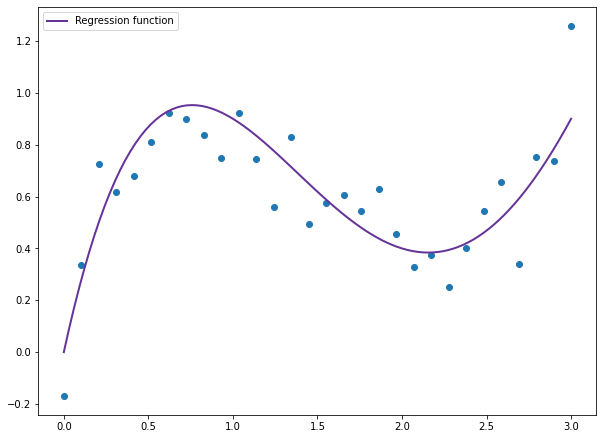

In [4]:
plt.figure(figsize=(10,7.5))
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.legend()

In [5]:
XX = np.vstack([np.ones(nn),xx]).T
XX_vect = np.stack([np.ones(len(x_vect)),x_vect]).T
results = sm.OLS(yy,XX).fit()

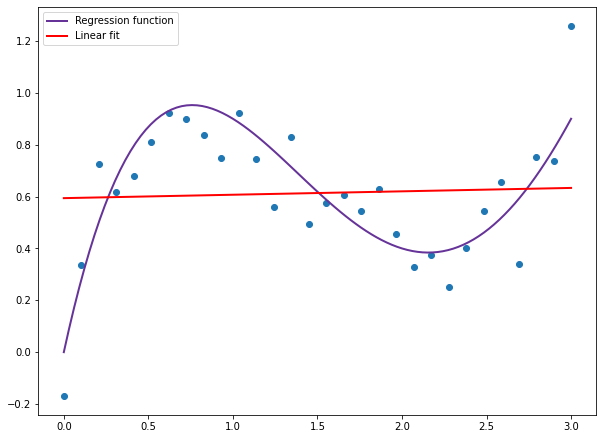

In [6]:
plt.figure(figsize=(10,7.5))
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_vect, results.predict(XX_vect),
    color = 'red', linewidth = 2,
    label = "Linear fit")
plt.legend()

In [7]:
XX = np.vstack([np.ones(nn),xx,xx**2]).T
XX_vect = np.stack([np.ones(len(x_vect)),x_vect,x_vect**2]).T
results = sm.OLS(yy,XX).fit()

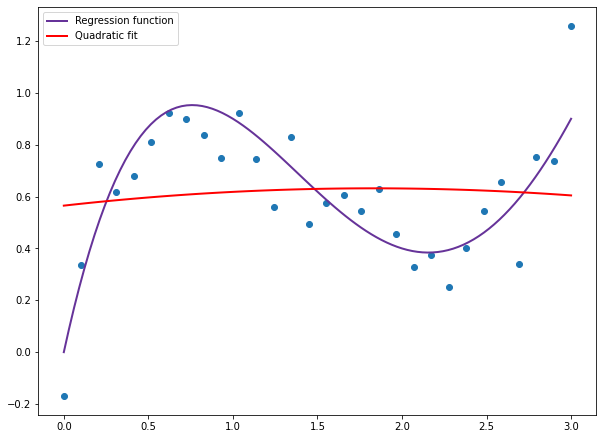

In [8]:
plt.figure(figsize=(10,7.5))
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_vect, results.predict(XX_vect),
    color = 'red', linewidth = 2,
    label = "Quadratic fit")
plt.legend()

In [9]:
XX = np.vstack([np.ones(nn),xx,xx**2,xx**3]).T
XX_vect = np.stack([np.ones(len(x_vect)),x_vect,x_vect**2,x_vect**3]).T
results = sm.OLS(yy,XX).fit()


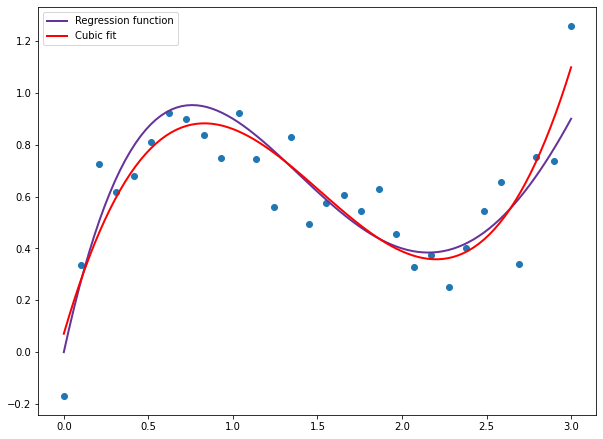

In [10]:
plt.figure(figsize=(10,7.5))
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_vect, results.predict(XX_vect),
    color = 'red', linewidth = 2,
    label = "Cubic fit")
plt.legend()

In [11]:
XX = np.vstack([np.ones(nn),xx,xx**2,xx**3,xx**4]).T
XX_vect =  np.stack([np.ones(len(x_vect)),x_vect,x_vect**2,x_vect**3,x_vect**4]).T
results = sm.OLS(yy,XX).fit()

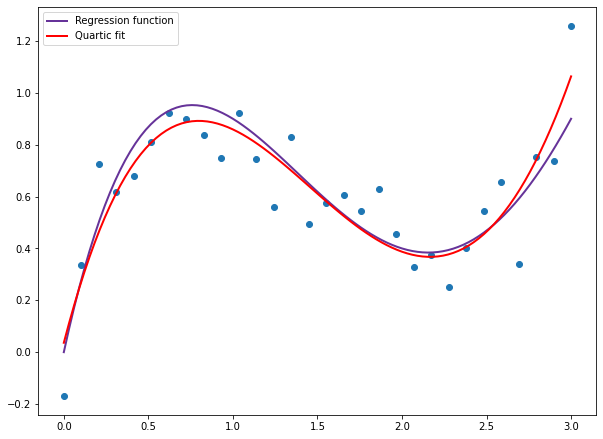

In [12]:
plt.figure(figsize=(10,7.5))
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_vect, results.predict(XX_vect),
    color = 'red', linewidth = 2,
    label = "Quartic fit")
plt.legend()

In [13]:
A = np.vstack([np.ones(10),xx[:10]]).T
B = np.vstack([np.ones(10),xx[10:20]]).T
C = np.vstack([np.ones(10),xx[20:30]]).T
Z = np.zeros((10,2))

XX = np.block([[A,Z,Z],[Z,B,Z],[Z,Z,C]])
bets = np.linalg.solve(XX.T @ XX, XX.T @ yy)
s2 = sum((yy - XX @ bets)**2)/(nn-1)
p = len(bets)

x_grp_1 = x_vect[x_vect<=1]
XX_grp_1 = np.vstack([np.ones(len(x_grp_1)), x_grp_1]).T
x_grp_2 = x_vect[(1<=x_vect) & (x_vect<=2)]
XX_grp_2 = np.vstack([np.ones(len(x_grp_2)), x_grp_2]).T
x_grp_3 = x_vect[(2<=x_vect) & (x_vect<=3)]
XX_grp_3 = np.vstack([np.ones(len(x_grp_3)), x_grp_3]).T

XX_grp = np.block([
    [XX_grp_1[:-1,:], np.zeros((33,2)), np.zeros((33,2))],
    [np.zeros((33,2)), XX_grp_2[:-1,:], np.zeros((33,2))],
    [np.zeros((34,2)), np.zeros((34,2)), XX_grp_3]
])

aux_t_conf = np.sqrt(s2 * np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T)))
aux_t_pred = np.sqrt(s2 * (1+np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T))))

low_conf = XX_grp @ bets - t.ppf(1-alpha/2,nn-p)*aux_t_conf
upp_conf = XX_grp @ bets + t.ppf(1-alpha/2,nn-p)*aux_t_conf
low_pred = XX_grp @ bets - t.ppf(1-alpha/2,nn-p)*aux_t_pred
upp_pred = XX_grp @ bets + t.ppf(1-alpha/2,nn-p)*aux_t_pred

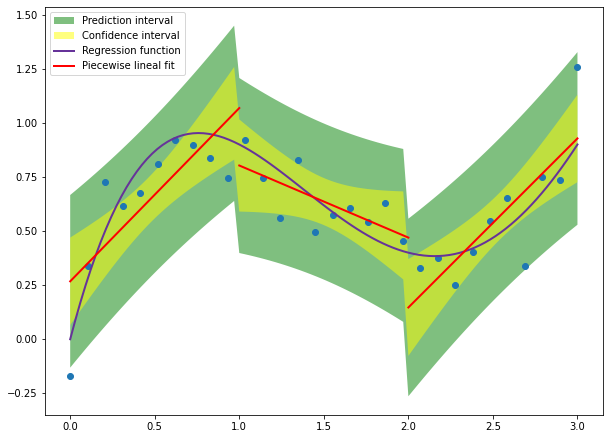

In [14]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_grp_1, XX_grp_1 @ bets[[0,1]],
    color = 'red', linewidth = 2,
    label = "Piecewise lineal fit")
plt.plot(x_grp_2, XX_grp_2 @ bets[[2,3]],
    color = 'red', linewidth = 2)
plt.plot(x_grp_3, XX_grp_3 @ bets[[4,5]],
    color = 'red', linewidth = 2)
plt.legend()

plt.savefig('cubic_splines_1.png')

In [15]:
k1 = 1
k2 = 2
K = np.array([[1, k1, -1, -k1, 0, 0], [0, 0, 1, k2, -1, -k2]])

aux1 = np.linalg.solve(XX.T @ XX, K.T)
aux2 = np.linalg.solve(K @ aux1, K @ bets)
tilbets = bets - aux1 @ aux2
s2 = sum((yy - XX @ tilbets)**2)/(nn-1)
p = len(tilbets)

aux_t_conf = np.sqrt(s2 * np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T)))
aux_t_pred = np.sqrt(s2 * (1+np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T))))

low_conf = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_conf
upp_conf = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_conf
low_pred = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_pred
upp_pred = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_pred

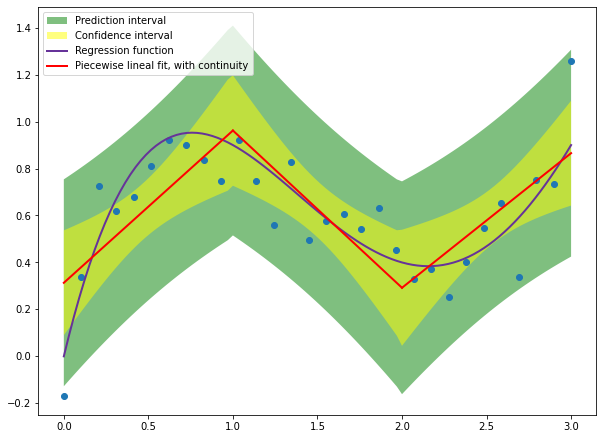

In [16]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_grp_1, XX_grp_1 @ tilbets[[0,1]],
    color = 'red', linewidth = 2,
    label = "Piecewise lineal fit, with continuity")
plt.plot(x_grp_2, XX_grp_2 @ tilbets[[2,3]],
    color = 'red', linewidth = 2)
plt.plot(x_grp_3, XX_grp_3 @ tilbets[[4,5]],
    color = 'red', linewidth = 2)
plt.legend()

plt.savefig('cubic_splines_2.png')

In [17]:
A = np.vstack([np.ones(10),xx[:10],xx[:10]**2,xx[:10]**3]).T
B = np.vstack([np.ones(10),xx[10:20],xx[10:20]**2,xx[10:20]**3]).T
C = np.vstack([np.ones(10),xx[20:30],xx[20:30]**2,xx[20:30]**3]).T
Z = np.zeros((10,4))

XX = np.block([[A,Z,Z],[Z,B,Z],[Z,Z,C]])
bets = np.linalg.solve(XX.T @ XX, XX.T @ yy)

K = np.array([[1, k1, k1**2, k1**3, -1, -k1, -k1**2, -k1**3, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, k2, k2**2, k2**3, -1, -k2, -k2**2, -k2**3]])

aux1 = np.linalg.solve(XX.T @ XX, K.T)
aux2 = np.linalg.solve(K @ aux1, K @ bets)
tilbets = bets - aux1 @ aux2
s2 = sum((yy - XX @ tilbets)**2)/(nn-1)
p = len(tilbets)

x_grp_1 = x_vect[x_vect<=1]
XX_grp_1 = np.vstack([np.ones(len(x_grp_1)), x_grp_1, x_grp_1**2, x_grp_1**3]).T
x_grp_2 = x_vect[(1<=x_vect) & (x_vect<=2)]
XX_grp_2 = np.vstack([np.ones(len(x_grp_2)), x_grp_2, x_grp_2**2, x_grp_2**3]).T
x_grp_3 = x_vect[(2<=x_vect) & (x_vect<=3)]
XX_grp_3 = np.vstack([np.ones(len(x_grp_3)), x_grp_3, x_grp_3**2, x_grp_3**3]).T

XX_grp = np.block([
    [XX_grp_1[:-1,:], np.zeros((33,4)), np.zeros((33,4))],
    [np.zeros((33,4)), XX_grp_2[:-1,:], np.zeros((33,4))],
    [np.zeros((34,4)), np.zeros((34,4)), XX_grp_3]
])

aux_t_conf = np.sqrt(s2 * np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T)))
aux_t_pred = np.sqrt(s2 * (1+np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T))))

low_conf = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_conf
upp_conf = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_conf
low_pred = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_pred
upp_pred = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_pred

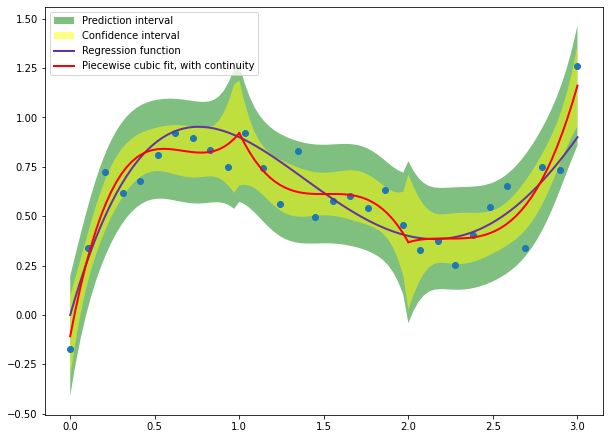

In [18]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_grp_1, XX_grp_1 @ tilbets[:4],
    color = 'red', linewidth = 2,
    label = "Piecewise cubic fit, with continuity")
plt.plot(x_grp_2, XX_grp_2 @ tilbets[4:8],
    color = 'red', linewidth = 2)
plt.plot(x_grp_3, XX_grp_3 @ tilbets[8:12],
    color = 'red', linewidth = 2)
plt.legend()

plt.savefig('cubic_splines_3.png')

In [19]:
K = np.block([[K],
    [0, 1, 2*k1, 3*k1**2, 0, -1, -2*k1, -3*k1**2, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 2*k2, 3*k2**2, 0, -1, -2*k2, -3*k2**2]])

aux1 = np.linalg.solve(XX.T @ XX, K.T)
aux2 = np.linalg.solve(K @ aux1, K @ bets)
tilbets = bets - aux1 @ aux2
s2 = sum((yy - XX @ tilbets)**2)/(nn-1)
p = len(tilbets)

aux_t_conf = np.sqrt(s2 * np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T)))
aux_t_pred = np.sqrt(s2 * (1+np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T))))

low_conf = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_conf
upp_conf = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_conf
low_pred = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_pred
upp_pred = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_pred

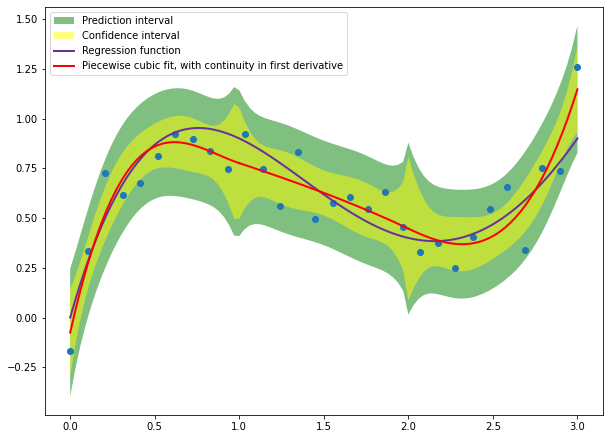

In [20]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_grp_1, XX_grp_1 @ tilbets[:4],
    color = 'red', linewidth = 2,
    label = "Piecewise cubic fit, with continuity in first derivative")
plt.plot(x_grp_2, XX_grp_2 @ tilbets[4:8],
    color = 'red', linewidth = 2)
plt.plot(x_grp_3, XX_grp_3 @ tilbets[8:12],
    color = 'red', linewidth = 2)
plt.legend()
plt.savefig('cubic_splines_4.png')

In [21]:
K = np.block([[K],
    [0, 0, 2, 6*k1, 0, 0, -2, -6*k1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 2, 6*k2, 0, 0, -2, -6*k2]])

aux1 = np.linalg.solve(XX.T @ XX, K.T)
aux2 = np.linalg.solve(K @ aux1, K @ bets)
tilbets = bets - aux1 @ aux2
s2 = sum((yy - XX @ tilbets)**2)/(nn-1)
p = len(tilbets)

aux_t_conf = np.sqrt(s2 * np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T)))
aux_t_pred = np.sqrt(s2 * (1+np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T))))

low_conf = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_conf
upp_conf = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_conf
low_pred = XX_grp @ tilbets - t.ppf(1-alpha/2,nn-p)*aux_t_pred
upp_pred = XX_grp @ tilbets + t.ppf(1-alpha/2,nn-p)*aux_t_pred

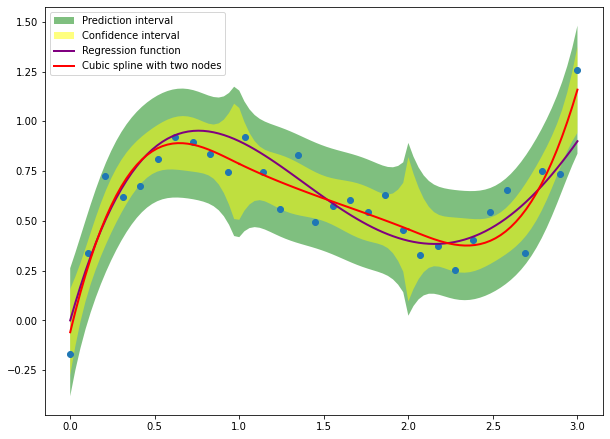

In [22]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'purple', linewidth = 2,
    label = "Regression function")
plt.plot(x_grp_1, XX_grp_1 @ tilbets[:4],
    color = 'red', linewidth = 2,
    label = "Cubic spline with two nodes")
plt.plot(x_grp_2, XX_grp_2 @ tilbets[4:8],
    color = 'red', linewidth = 2)
plt.plot(x_grp_3, XX_grp_3 @ tilbets[8:12],
    color = 'red', linewidth = 2)
plt.legend()
plt.savefig('cubic_splines_5.png')

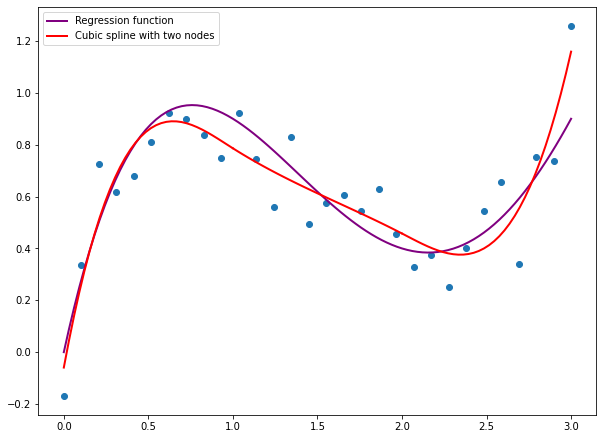

In [23]:
plt.figure(figsize=(10,7.5))
#plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
#plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'purple', linewidth = 2,
    label = "Regression function")
plt.plot(x_grp_1, XX_grp_1 @ tilbets[:4],
    color = 'red', linewidth = 2,
    label = "Cubic spline with two nodes")
plt.plot(x_grp_2, XX_grp_2 @ tilbets[4:8],
    color = 'red', linewidth = 2)
plt.plot(x_grp_3, XX_grp_3 @ tilbets[8:12],
    color = 'red', linewidth = 2)
plt.legend()

plt.savefig('cubic_splines_6.png')

In [24]:
tck = interpolate.splrep(xx, yy, t=[k1,k2], k=3)
y_hat = interpolate.splev(xx, tck)
y_vect_hat = interpolate.splev(x_vect, tck)
s2 = sum((yy - y_hat)**2)/(nn-1)
p = len(tck[1])

aux_t_conf = np.sqrt(s2 * np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T)))
aux_t_pred = np.sqrt(s2 * (1+np.diag(XX_grp @ np.linalg.solve(XX.T @ XX, XX_grp.T))))

low_conf = y_vect_hat - t.ppf(1-alpha/2,nn-p)*aux_t_conf
upp_conf = y_vect_hat + t.ppf(1-alpha/2,nn-p)*aux_t_conf
low_pred = y_vect_hat - t.ppf(1-alpha/2,nn-p)*aux_t_pred
upp_pred = y_vect_hat + t.ppf(1-alpha/2,nn-p)*aux_t_pred

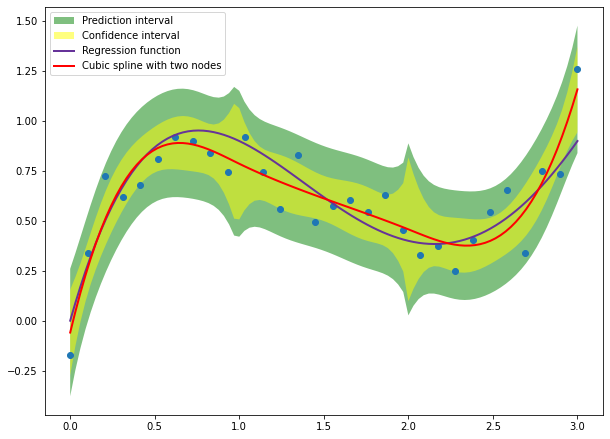

In [25]:
plt.figure(figsize=(10,7.5))
plt.fill_between(x_vect, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x_vect, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.scatter(xx, yy)
plt.plot(x_vect, y_vect,
    color = 'RebeccaPurple', linewidth = 2,
    label = "Regression function")
plt.plot(x_vect, y_vect_hat,
    color = 'red', linewidth = 2,
    label = "Cubic spline with two nodes")
plt.legend()